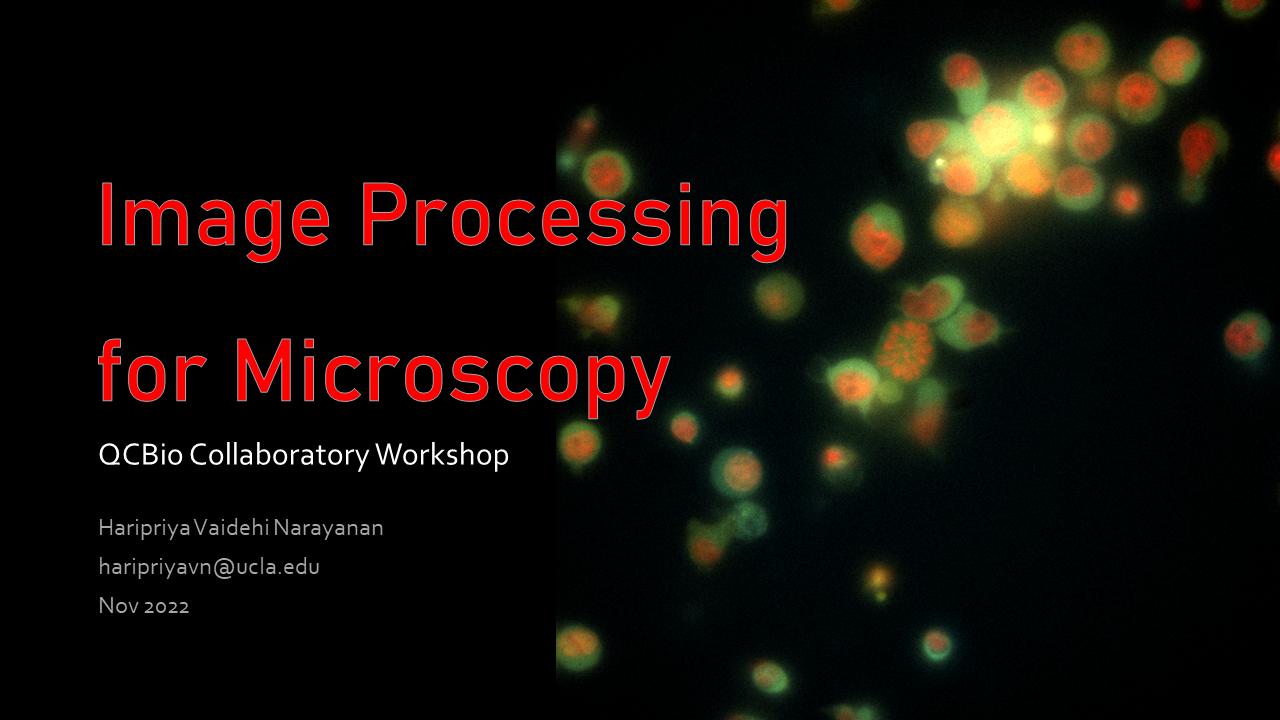

### **0. Install / import and test all packages required for the notebook**

First step is always to install any packages if required. In this workshop, we will ideally not need to do any installation - Google Co-Lab already has built-in up-to-date versions of most packages we'll need... Hence less hassle, yayy for us! :)/

Let's assume things are installed into our Python kernel, and go ahead and simply import these into our notebook, so that we can start using them here.

In [ ]:
# This hash symbol is how we write comments into the code --> these will not be executed
# So we can basically write any kind of notes we want like this, to annotate our code!

# First, we import the NumPy library, which gives us a way of handling numbers in arrays - which is basically what images are!
# Find the source documentation reference at https://numpy.org/doc/stable (you can follow this clickable hyperlink!)
import numpy as np

In [ ]:
# Let's test whether NumPy is working in your notebook by running a simple line of code

# First, we'll check what version of NumPy we have running
print("The version of NumPy we're using is ", np.__version__)

# We'll print the value of the constant pi, which is built into Numpy
print(np.pi)
# If you get the output 3.14159..... then NumPy is working in your notebook!

In [ ]:
# Next, we need the Matplotlib library, which gives us routines to plot graphs and display images
# Find the source documentation reference at https://matplotlib.org/stable/index.html

# The pyplot module in Matplotlib is what we'll use to plot different kinds of graphs
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Again, let's test this by running a simple line of code
# We'll plot a simple graph of X = (0 to 10) vs Y = (10 to 0)
plt.plot(np.arange(0, 10, 1), np.arange(10, 0, -1))
# If you get a line graph of a line with slope -1 then Matplotlib is working in your notebook

In [ ]:
# Finally, the star of the show - we will import the different modules we need from scikit-image (skimage)
# Find the source documentation reference at https://scikit-image.org/docs/stable/api/api.html

# First, we'll check what version of scikit-image we have available
import skimage
print("The version of scikit-image we're using is ", skimage.__version__)

# Next, we'll import all the specific modules we require for our workshop
from skimage import color, data, exposure, feature, filters, measure, morphology, transform, util

In [ ]:
# Let's test this too, by displaying a built-in sample image of a bush from the "data" module
image_of_a_bush = data.lfw_subset()
image_of_a_bush = image_of_a_bush[0,:,:]

# We will print the number of dimensions, the shape, and the pixel values of this image
print("The number of dimensions of the image is ", image_of_a_bush.ndim)
print("The size of the image is ", image_of_a_bush.shape[0], " by ", image_of_a_bush.shape[1], " pixels.")

In [ ]:
# Let's go ahead and also print what exactly the image of our bush looks like to the computer
print(image_of_a_bush)
# Is it picturesque?!

In [ ]:
# That looked funky! Shall we now take a look at what the image of our bush looks like to our HUMAN eyes?
plt.imshow(image_of_a_bush, cmap = 'gray')
# Ta da!!

### **1. Image display and Look Up Tables**

IMPORTANT!! In this workshop, we will work entirely with built-in images provided with the skimage.data module, to avoid issues with downloading and file paths. When you want to work with locally stored images from your computer, this is how you can load them -

In [ ]:
# img_stored = skimage.io.imread("./AbsoluteFilePath/SavedPhoto.fmt")

In [ ]:
# Let's load a nice interesting image from our built-in dataset, of stained human cell nuclei undergoing mitosis
img_mitosis = data.human_mitosis()

In [ ]:
# Let's first take a look at what kind of metadata properties skimage stores for this image, and their current values
for attr in dir(img_mitosis):
  print("obj.%s = %r" % (attr, getattr(img_mitosis, attr)))

In [ ]:
# Let's now take a look at the image itself!
# First, as in the example above, we'll take a look at the actual pixel values that the computer sees
print(img_mitosis)

In [ ]:
# Next, we will look at the human-viewable display that makes sense to us as an image
# We will use the default colormap for the time being...
plt.figure(figsize = (8, 8))
plt.imshow(img_mitosis)
plt.colorbar()

In [ ]:
# Now, let's change the colormaps and try out a few examples....
# First, we'll go with grayscale - the simplest!
plt.figure(figsize = (8, 8))
plt.imshow(img_mitosis, cmap = 'gray')
plt.colorbar()

In [ ]:
# Next, we'll invert this image in two ways....
plt.figure(figsize = (24, 8))
plt.gcf().suptitle('The two methods of inversion are different!!\n On the left, we reversed the colormap only. Middle & right, we reversed the actual pixel values!!', fontsize = 24, color='red')

# First, using the same colormap except reversed!
plt.subplot(131)
plt.imshow(img_mitosis, cmap = 'gray_r')
plt.colorbar()

# Next, using the built-in function from skimage - NOTE WHICH COLORMAP TO USE!!
plt.subplot(132)
plt.imshow(util.invert(img_mitosis), cmap = 'gray_r')
plt.colorbar()

# Clearly you can't use the same colormap to get the same display in both cases! Try the other option!
plt.subplot(133)
plt.imshow(util.invert(img_mitosis), cmap = 'gray')
plt.colorbar()

In [ ]:
# Shall we try out a few more colormaps? Your turn to write up the code for the following -
# Here is some documentation for the different colormaps (to look up spelling, etc) - https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.figure(figsize = (24, 16))

plt.subplot(231)
# Display the image with the perceptually uniform "inferno" colormap ; include a colorbar of course!
plt.imshow(img_mitosis, cmap = 'inferno')
plt.colorbar()
plt.gca().set_title('Colormap : Inferno (Perceptually uniform)')

plt.subplot(232)
# Let's now try the sequential "Wistia" colormap
plt.imshow(img_mitosis, cmap = 'Wistia')
plt.colorbar()
plt.gca().set_title('Colormap : Wistia (Sequential)')

plt.subplot(233)
# Now let's try out the diverging "seismic" scale
plt.imshow(img_mitosis, cmap = 'seismic')
plt.colorbar()
plt.gca().set_title('Colormap : Seismic (Diverging)')

plt.subplot(234)
# Next, let's try out the cyclic "hsv" scale
plt.imshow(img_mitosis, cmap = 'hsv')
plt.colorbar()
plt.gca().set_title('Colormap : HSV (Cyclic)')

plt.subplot(235)
# Out of curiosity, let's go here with the qualitative "Accent" scale
plt.imshow(img_mitosis, cmap = 'Accent')
plt.colorbar()
plt.gca().set_title('Colormap : Accent (Qualitative)')

plt.subplot(236)
# Finally, we'll go with my favourite - the "nipy_spectral" scale!
plt.imshow(img_mitosis, cmap = 'nipy_spectral')
plt.colorbar()
plt.gca().set_title('Colormap : Nipy-spectral (My fave for microscopy!)')

In [ ]:
# Lastly, we can also display a contour map of the image
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.imshow(img_mitosis, cmap = 'gray')
plt.gca().set_title('Raw image')

plt.subplot(122)
plt.gca().contour(img_mitosis, origin='image')
plt.gca().set_title('Contour plot of the same raw image')
plt.show()

In [ ]:
# Now let's get the bit depth of the image
print("Data type = ", img_mitosis.dtype)

# Let's confirm its range by printing the minimum and maximum values in the image
print("Minimum = ", img_mitosis.min(), " & Maximum = ", img_mitosis.max())

In [ ]:
# The Uint8 type is on a scale of 0 to 255
# We will now convert this image to float, which is on a completely different scale of 0 to 1
img_mitosis_float = util.img_as_float(img_mitosis)

# Let's confirm the new range by printing the minimum and maximum values in the FLOAT image
print("Data type = ", img_mitosis_float.dtype)
print("Minimum = ", img_mitosis_float.min(), " & Maximum = ", img_mitosis_float.max())
# IMPORTANT NOTE - WE SAVED THE NEW BIT DEPTH AS A COPY OF THE ORIGINAL, WHILE PRESERVING THE ORIGINAL!

In [ ]:
# We will now convert this image to 16-bit signed int, which is yet again on a completely different scale
img_mitosis_16sint = util.img_as_int(img_mitosis)

# Let's confirm the new range by printing the minimum and maximum values in the FLOAT image
print("Data type = ", img_mitosis_16sint.dtype)
print("Minimum = ", img_mitosis_16sint.min(), " & Maximum = ", img_mitosis_16sint.max())

In [ ]:
# Now let's plot the 3 types of images side-by-side, using the same colormap
plt.figure(figsize = (24, 8))
plt.gcf().suptitle('These images LOOK identical - but they are ABSOLUTELY NOT the same!!', fontsize = 28, color='red')

plt.subplot(131)
plt.gca().set_title('Original 8-bit unsigned image') # NOTE - the gca() function stands for "get current axes" and can be used to chaneg attributes for each subplot
plt.imshow(img_mitosis, cmap = 'inferno')
plt.colorbar()

plt.subplot(132)
plt.gca().set_title('Float image')
plt.imshow(img_mitosis_float, cmap = 'inferno')
plt.colorbar()

plt.subplot(133)
plt.gca().set_title('16-bit signed image')
plt.imshow(img_mitosis_16sint, cmap = 'inferno')
plt.colorbar()

<font color='blue' size='6' face='corbel'>
<u>BOTTOM LINE</u> - Images can look different and be identical, OR look identical and be completely different.

<b>BEWARE</b> before analyzing / performing operations! Always check the data type to see whether you're comparing apples to apples.
</font>

### **2. Exposure and Gamma values**

In [ ]:
# Let's work with an image that will highlight the effects of contrast and exposure
# Load the nuclear channel of the 30th image in the stack cells3d from skimage.data on a 0 to 1 scale
img_nuc30_cells3d = data.cells3d()
img_nuc30_cells3d= util.img_as_float(img_nuc30_cells3d[30, 1, :, :])

# Let's check first whether the image is considered low contrast?
print('Is the image low contrast? ', exposure.is_low_contrast(img_nuc30_cells3d))

In [ ]:
# Now we'll display the image and look for ourselves
plt.figure(figsize = (8,8))
plt.imshow(img_nuc30_cells3d, cmap='gray')
plt.colorbar()

In [ ]:
# Perform the following operations on this image and see how they affect the appearance of the image
# Display all the images in a 3 X 2 format, with the original image at the top left
plt.figure(figsize = (24, 16))
plt.gcf().suptitle('Contrast adjustment methods', size = 24)

# 0. Show original image for reference
plt.subplot(231)
plt.gca().set_title('Original image')
plt.imshow(img_nuc30_cells3d, cmap = 'gray', vmin = 0, vmax = 1)
plt.colorbar()

# 1. Set gamma = 2
plt.subplot(232)
plt.gca().set_title('gamma = 2')
plt.imshow(exposure.adjust_gamma(img_nuc30_cells3d, 2), cmap = 'gray', vmin = 0, vmax = 1)
plt.colorbar()

# 2. Set gamma = 0.5
plt.subplot(233)
plt.gca().set_title('gamma = 0.5')
plt.imshow(exposure.adjust_gamma(img_nuc30_cells3d, 0.5), cmap = 'gray', vmin = 0, vmax = 1)
plt.colorbar()

# 3. Apply logarithmic correction
plt.subplot(234)
plt.gca().set_title('Log correction')
plt.imshow(exposure.adjust_log(img_nuc30_cells3d), cmap = 'gray', vmin = 0, vmax = 1)
plt.colorbar()

# 4. Apply sigmoidal correction
plt.subplot(235)
plt.gca().set_title('Sigmoid correction')
plt.imshow(exposure.adjust_sigmoid(img_nuc30_cells3d), cmap = 'gray', vmin = 0, vmax = 1)
plt.colorbar()

# 5. Apply intensity rescaling from 0.4 to 0.6
plt.subplot(236)
plt.gca().set_title('Rescaled intensity')
plt.imshow(exposure.rescale_intensity(img_nuc30_cells3d, (img_nuc30_cells3d.min(), img_nuc30_cells3d.max()), (0.4,0.6)), cmap = 'gray', vmin = 0, vmax = 1)
plt.colorbar()

### **3. RGB images**

In [ ]:
# For this section, let's load an RGB colour image, showing a histological section of villi in the colon
# A particular protein is highlighted with DAB (brown) immunostaining, while the cells are highlighted with hematoxylin (blue) counter-staining
img_ihc = data.immunohistochemistry()
plt.figure(figsize = (8, 8))
plt.imshow(img_ihc)

In [ ]:
# Let's split this image into each of the three channels, and view them separately!
plt.figure(figsize = (24, 8))
plt.subplot(131)
plt.gca().set_title('Red channel')
plt.imshow(img_ihc[:,:,0], cmap = 'Reds')

plt.subplot(132)
plt.gca().set_title('Green channel')
plt.imshow(img_ihc[:,:,1], cmap = 'Greens')

plt.subplot(133)
plt.gca().set_title('Blue channel')
plt.imshow(img_ihc[:,:,2], cmap = 'Blues')

In [ ]:
# Note that it's possible to analyze this using a built-in skimage function to separate DAB and H&E staining!
img_ihc_hed = color.rgb2hed(img_ihc)
# Display the channels
plt.figure(figsize = (24, 8))

plt.subplot(131)
plt.gca().set_title('Original RGB image')
plt.imshow(img_ihc)

plt.subplot(132)
plt.gca().set_title('DAB staining isolated')
plt.imshow(img_ihc_hed[:,:,2])

plt.subplot(133)
plt.gca().set_title('Hematoxylin staining isolated')
plt.imshow(img_ihc_hed[:,:,0])

In [ ]:
# The above singe-channel images are displayed in the default viridis colormap, because they're considered grayscale!
# If we want to recapture the colours, we need to reconvert them to rgb

# First, we need to create a dummy single-channel image of the same size, to represent the empty channels
null = np.zeros_like(img_ihc_hed[:, :, 0])
# Then, we reconstruct the RGB images appropriately, by putting each single-channel image in the right position and filling the other two positions with the dummy values
img_ihc_h = color.hed2rgb(np.stack((img_ihc_hed[:, :, 0], null, null), axis=-1))
img_ihc_d = color.hed2rgb(np.stack((null, null, img_ihc_hed[:, :, 2]), axis=-1))

# Now we can display the three channels!
plt.figure(figsize = (24, 8))

plt.subplot(131)
plt.gca().set_title('Original RGB image')
plt.imshow(img_ihc)

plt.subplot(132)
plt.gca().set_title('DAB staining isolated')
plt.imshow(img_ihc_d)

plt.subplot(133)
plt.gca().set_title('Hematoxylin staining isolated')
plt.imshow(img_ihc_h)

In [ ]:
# Finally, let's convert our RGB image to grayscale
img_ihc_gray = color.rgb2gray(img_ihc)
plt.figure(figsize = (8,8))
plt.imshow(img_ihc_gray, cmap = 'gray')
# NOTE - the image is not "gray" because of the colormap.... It's single-channel, which means grayscale by default
# But it's nice to also make it look gray, hence the colormap!

In [ ]:
# Can we convert the grayscale image back to colour?
img_ihc_gray2rgb = color.gray2rgb(img_ihc_gray)
plt.figure(figsize = (16, 8))

plt.subplot(121)
plt.gca().set_title('Original RGB image')
plt.imshow(img_ihc)

plt.subplot(122)
plt.gca().set_title('Reconverted from grayscale')
plt.imshow(img_ihc_gray2rgb)
plt.gcf().suptitle('\n LOST COLOUR DATA CANNOT BE RECONSTRUCTED!', color='red', size=24)

### **4. Image sequences (videos / stacks) : Projections**

In [ ]:
# Let's load an image sequence to work with
# We will use a 3-D volumetric Z-stack with 2 channels showing nucleus and cytoplasm
img_stack = util.img_as_float(data.cells3d())

In [ ]:
# Plotly is a package that helps us animate graphical displays in Python
# Here, we will use Plotly to create a slider that allows us to run through the various images in the Z-stack
import plotly
import plotly.express as px
fig = px.imshow(img_stack, facet_col=1, animation_frame=0, binary_string=True, binary_format='jpg')
fig.layout.annotations[0]['text'] = 'Cell membranes'
fig.layout.annotations[1]['text'] = 'Nuclei'
plotly.io.show(fig)

In [ ]:
# First, we will display 2 different slices to show the differences between them in each channel
# Let's choose to display the 15th and 30th slices of the stack - 1/4th and 1/2-way along the thickness of the section
plt.figure(figsize = (16, 16))

plt.subplot(221)
plt.gca().set_title('Slice 15 : Cytoplasm')
plt.imshow(img_stack[14, 0], cmap = 'inferno', vmin = 0, vmax = 1)

plt.subplot(222)
plt.gca().set_title('Slice 15 : Nucleus')
plt.imshow(img_stack[14, 1], cmap = 'inferno', vmin = 0, vmax = 1)

plt.subplot(223)
plt.gca().set_title('Slice 30 : Cytoplasm')
plt.imshow(img_stack[29, 0], cmap = 'inferno', vmin = 0, vmax = 1)

plt.subplot(224)
plt.gca().set_title('Slice 30 : Nucleus')
plt.imshow(img_stack[29, 1], cmap = 'inferno', vmin = 0, vmax = 1)

In [ ]:
# First, let's take a MAXIMUM INTENSITY PROJECTION of all images in the stack
# Numpy provides us a maximum function for any array, given an axis
# In this case, our array is the 3D stack, and we're projecting along the Z-axis for slices!
img_stack_maxp_cyto= np.max(img_stack[:,0], axis=0)
img_stack_maxp_nuc= np.max(img_stack[:,1], axis=0)

plt.figure(figsize = (16, 8))
plt.gcf().suptitle('Maximum intensity projections', size = 24)

plt.subplot(121)
plt.imshow(img_stack_maxp_cyto, cmap = 'inferno', vmin = 0, vmax = 1)

plt.subplot(122)
plt.imshow(img_stack_maxp_nuc, cmap = 'inferno', vmin = 0, vmax = 1)

In [ ]:
# Similarly, let's take a MINIMUM INTENSITY PROJECTION of all images in the stack
img_stack_minp_cyto= np.min(img_stack[:,0], axis=0)
img_stack_minp_nuc= np.min(img_stack[:,1], axis=0)

plt.figure(figsize = (16, 8))
plt.gcf().suptitle('Minimum intensity projections', size = 24)

plt.subplot(121)
plt.imshow(img_stack_minp_cyto, cmap = 'inferno', vmin = 0, vmax = 1)

plt.subplot(122)
plt.imshow(img_stack_minp_nuc, cmap = 'inferno', vmin = 0, vmax = 1)

In [ ]:
# What about the average of all slices?!
# Let's take a MEAN INTENSITY PROJECTION of all images in the stack
img_stack_meanp_cyto= np.average(img_stack[:,0], axis=0)
img_stack_meanp_nuc= np.average(img_stack[:,1], axis=0)

plt.figure(figsize = (16, 8))
plt.gcf().suptitle('Mean intensity projections', size = 24)

plt.subplot(121)
plt.imshow(img_stack_meanp_cyto, cmap = 'inferno', vmin = 0, vmax = 1)

plt.subplot(122)
plt.imshow(img_stack_meanp_nuc, cmap = 'inferno', vmin = 0, vmax = 1)

For many video of fast moving objects, a mean intensity projection acoss many frames can smooth out the objects and provide a very good estimate of the background, for subtraction and noise cleaning.

### **5. Image histograms : Statistics and binaries**

In [ ]:
# Let's work with images having different kinds of histograms
img_cell = util.img_as_float(data.cell())
img_mitosis = util.img_as_float(data.human_mitosis())
img_retina = util.img_as_float(color.rgb2gray(data.retina()))

In [ ]:
# To create histograms, we first have to flatten the 2D pixel array into a 1D array of numbers
# Then we can plot the histograms using Matplotlib
plt.figure(figsize = (18, 12))

plt.subplot(231)
plt.gca().set_title('QPI of a single cell')
plt.imshow(img_cell, cmap = 'gray', vmin = 0, vmax = 1)
plt.subplot(234)
plt.hist(img_cell.flatten(), bins = 64, density = True)

plt.subplot(232)
plt.gca().set_title('Field of nuclei')
plt.imshow(img_mitosis, cmap = 'gray', vmin = 0, vmax = 1)
plt.subplot(235)
plt.hist(img_mitosis.flatten(), bins = 64, density = True)

plt.subplot(233)
plt.gca().set_title('Retinal fundus with nerves')
plt.imshow(img_retina, cmap = 'gray', vmin = 0, vmax = 1)
plt.subplot(236)
plt.hist(img_retina.flatten(), bins = 64, density = True)

In [ ]:
# Sometimes we can't see the realy low bumps properly, so we can set the Y-axis to a log scale
plt.figure(figsize = (18, 12))
plt.subplot(231)
plt.gca().set_title('QPI of a single cell')
plt.imshow(img_cell, cmap = 'gray', vmin = 0, vmax = 1)
plt.subplot(234)
plt.hist(img_cell.flatten(), bins = 64, density = True, log = True)

plt.subplot(232)
plt.gca().set_title('Field of nuclei')
plt.imshow(img_mitosis, cmap = 'gray', vmin = 0, vmax = 1)
plt.subplot(235)
plt.hist(img_mitosis.flatten(), bins = 64, density = True, log = True)

plt.subplot(233)
plt.gca().set_title('Retinal fundus with nerves')
plt.imshow(img_retina, cmap = 'gray', vmin = 0, vmax = 1)
plt.subplot(236)
plt.hist(img_retina.flatten(), bins = 64, density = True, log = True)

In [ ]:
# We can adjust the histograms to alter brightness and contrast in the images
# For eg, let's square all the pixels - this will shift the distribution to the darker side, and make brighter spots stand out even more!
img_mitosis_square = img_mitosis**2

plt.figure(figsize = (12, 12))

plt.subplot(221)
plt.gca().set_title('Original image')
plt.imshow(img_mitosis, cmap = 'nipy_spectral', vmin = 0, vmax = 1)

plt.subplot(222)
plt.gca().set_title('Squared image')
plt.imshow(img_mitosis_square, cmap = 'nipy_spectral', vmin = 0, vmax = 1)

plt.subplot(223)
plt.hist(img_mitosis.flatten(), bins=64, density = True)

plt.subplot(224)
plt.hist(img_mitosis_square.flatten(), bins=64, density = True)

In [ ]:
# We can perform contrast enhancement operations like histogram equalization
img_nuc30_eqhist = exposure.equalize_hist(img_nuc30_cells3d)

plt.figure(figsize = (12, 12))

plt.subplot(221)
plt.gca().set_title('Original image')
plt.imshow(img_nuc30_cells3d, cmap = 'gray', vmin = 0, vmax = 1)

plt.subplot(222)
plt.gca().set_title('Histogram equalized image')
plt.imshow(img_nuc30_eqhist, cmap = 'gray', vmin = 0, vmax = 1)

plt.subplot(223)
plt.hist(img_nuc30_cells3d.flatten(), bins=64, density = True)
img_cdf, bins = exposure.cumulative_distribution(img_nuc30_cells3d, 64)
plt.plot(bins, img_cdf, 'r')

plt.subplot(224)
plt.hist(img_nuc30_eqhist.flatten(), bins=64, density = True)
img_cdf, bins = exposure.cumulative_distribution(img_nuc30_eqhist, 64)
plt.plot(bins, img_cdf, 'r')

In [ ]:
# We can also enhance contrast by a process called image clipping, where we get rid of the outlier pixels
lower_clip, upper_clip = np.percentile(img_nuc30_cells3d, q=(1, 99))
img_nuc30_rescaled = exposure.rescale_intensity(img_nuc30_cells3d, in_range=(lower_clip, upper_clip), out_range=np.float32)

plt.figure(figsize=(16,16))

plt.subplot(221)
plt.imshow(img_nuc30_cells3d, 'inferno', vmin = 0, vmax = 1)
plt.gca().set_title('Original image')

plt.subplot(222)
plt.imshow(img_nuc30_rescaled, 'inferno', vmin = 0, vmax = 1)
plt.gca().set_title('Clipped image')

plt.subplot(223)
plt.hist(img_nuc30_cells3d.flatten(), bins=64, density = True)
img_cdf, bins = exposure.cumulative_distribution(img_nuc30_cells3d, 64)
plt.plot(bins, img_cdf, 'r')

plt.subplot(224)
plt.hist(img_nuc30_rescaled.flatten(), bins=64, density = True)
img_cdf, bins = exposure.cumulative_distribution(img_nuc30_rescaled, 64)
plt.plot(bins, img_cdf, 'r')

<font color='red' size='8px'>Operations like equalization and clipping make the output image look brighter and sharper for better display. However, this is pixel value manipulation, and must NEVER be used in your quantitative analysis pipeline!</font>

In [ ]:
# Consider the first image of a single cell.... Let's identify the two parts, below ~0.3 and above ~0.3
img_cell_below = img_cell * (img_cell < 0.4)
img_cell_above = img_cell * (img_cell > 0.4)

plt.figure(figsize = (24,6))
plt.gcf().suptitle('Clearly the two parts of the histogram indicate foreground and background!', size = 24, color = 'red')

plt.subplot(141)
plt.gca().set_title('Original image')
plt.imshow(img_cell, cmap = 'nipy_spectral', vmin = 0, vmax = 1)
plt.colorbar()

plt.subplot(142)
plt.hist(img_cell.flatten(), bins = 64, density = True, log = True)
plt.axvline(0.4, color = 'red')

plt.subplot(143)
plt.gca().set_title('Portion below 0.4 brightness')
plt.imshow(img_cell_below, cmap = 'nipy_spectral', vmin = 0, vmax = 1)

plt.subplot(144)
plt.gca().set_title('Portion above 0.4 brightness')
plt.imshow(img_cell_above, cmap = 'nipy_spectral', vmin = 0, vmax = 1)

In [ ]:
# Likewise, what's in each of the two humps of the histogram in the retinal image?
img_retina_below = img_retina * (img_retina < 0.45) * (img_retina > 0.25)
img_retina_above = img_retina * (img_retina > 0.7)

plt.figure(figsize = (24,6))

plt.subplot(141)
plt.gca().set_title('Original image')
plt.imshow(img_retina, cmap = 'nipy_spectral', vmin = 0, vmax = 1)
plt.colorbar()

plt.subplot(142)
plt.hist(img_retina.flatten(), bins = 64, log = True, density = True)
import matplotlib.patches as pat
plt.gca().add_patch(pat.Rectangle((0.25, 0), 0.2, 10, color = 'red', alpha = 0.5))
plt.axvline(0.7, color = 'blue')

plt.subplot(143)
plt.gca().set_title('Portion in red rectangle peak')
plt.imshow(img_retina_below, cmap = 'nipy_spectral', vmin = 0, vmax = 1)

plt.subplot(144)
plt.gca().set_title('Portion in brightest peak')
plt.imshow(img_retina_above, cmap = 'nipy_spectral', vmin = 0, vmax = 1)

In [ ]:
# Similarly, how would you separate the nuclei from the background in the mitotic cells image?
# What about the brightest dividing nuclei?
img_mitosis_nuclei = img_mitosis * (img_mitosis > 0.15)
img_mitosis_divs = img_mitosis * (img_mitosis > 0.5)

plt.figure(figsize = (24,6))

plt.subplot(141)
plt.gca().set_title('Original image')
plt.imshow(img_mitosis, cmap = 'nipy_spectral', vmin = 0, vmax = 1)
plt.colorbar()

plt.subplot(142)
plt.hist(img_mitosis.flatten(), bins = 64, density = True, log = True)
plt.axvline(0.15, color = 'red')
plt.axvline(0.5, color = 'blue')

plt.subplot(143)
plt.gca().set_title('Nuclei')
plt.imshow(img_mitosis_nuclei, cmap = 'nipy_spectral', vmin = 0, vmax = 1)

plt.subplot(144)
plt.gca().set_title('Dividers')
plt.imshow(img_mitosis_divs, cmap = 'nipy_spectral', vmin = 0, vmax = 1)

<font color='blue' size='8px'> This should give you some intuition about the distribution of pixels belonging to different image structures on a histogram!</font>

In [ ]:
# What's up with the matrices we used to multiply our image and produce the new truncated image?

# This is called a binary mask, and it's a special case of 1-bit image, which can only take Boolean values 0 or 1
img_mitosis_nuclearmask = (img_mitosis > 0.15)
print("The Boolean image contents look like this - \n", img_mitosis_nuclearmask, "\n")

plt.figure(figsize = (16, 16))

plt.subplot(221)
plt.gca().set_title('Original image')
plt.imshow(img_mitosis, cmap = 'nipy_spectral')

plt.subplot(222)
plt.gca().set_title('Boolean image mask')
plt.imshow(img_mitosis_nuclearmask, cmap = 'gray')

# We can also perform logical operations on Boolean / binary images!
# For eg, we can apply a NOT gate to invert it!
plt.subplot(223)
plt.gca().set_title('NOT(Boolean mask)')
plt.imshow(np.logical_not(img_mitosis_nuclearmask), cmap = 'gray')

# For eg, we can also apply an XOR gate between the nuclei and the dividers, to pick out non-dividing cells!
img_mitosis_divmask = (img_mitosis > 0.5)
plt.subplot(224)
plt.gca().set_title('Non-dividers = Nuclei XOR Dividers')
plt.imshow(np.logical_xor(img_mitosis_nuclearmask, img_mitosis_divmask), cmap = 'gray')
# This is not perfect, but it can be manipulated further to get rid of the annular rings

### **6. Point operations using image matrices**

In [ ]:
# Let's work with the middle image of the cell membrane and nuclei stack
img_cyt30_cells3d= util.img_as_float(data.cells3d()[29, 0, :, :])
img_nuc30_cells3d= util.img_as_float(data.cells3d()[29, 1, :, :])

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.gca().set_title('Cytoplasm')
plt.imshow(img_cyt30_cells3d, cmap = 'inferno')

plt.subplot(122)
plt.gca().set_title('Nucleus')
plt.imshow(img_nuc30_cells3d, cmap = 'inferno')

In [ ]:
# MATRIX ADDITION - We can add these matrices together to superimpose them!
img_composite30_cells3d = 0.5*img_nuc30_cells3d + 0.5*img_cyt30_cells3d
plt.figure(figsize = (8,8))
plt.imshow(img_composite30_cells3d, cmap = 'inferno')

In [ ]:
# PROFILING - taking an intensity profile along a line
# For eg, let's take a profile of the composite above at the horizontal 100-line
profile = img_composite30_cells3d[100,:]

plt.figure(figsize = (16,8))

plt.subplot(121)
plt.imshow(img_composite30_cells3d, cmap = 'inferno')
plt.axhline(100, color = 'red')

plt.subplot(122)
plt.plot(profile)

In [ ]:
# MATRIX MULTIPLICATION - We already saw the case of applying clipping masks

# MATRIX MULTIPLICATION BY SCALARS -
# Let's now use an RGB image and create colour filters
img_ihc = data.immunohistochemistry()

# Say we want to enhance the blue channel - that is, weight the blue channel twice as much as the other two channels
img_ihc_blue_enh = np.zeros_like(img_ihc)
img_ihc_blue_enh[:,:,0] = 0.5*img_ihc[:,:,0]
img_ihc_blue_enh[:,:,1] = 0.5*img_ihc[:,:,1]
img_ihc_blue_enh[:,:,2] = img_ihc[:,:,2]

# Similarly, say we want to apply a blue filter - that is, remove the blue channel and keep the other two
img_ihc_blue_filt = np.zeros_like(img_ihc)
img_ihc_blue_filt[:,:,0] = img_ihc[:,:,0]
img_ihc_blue_filt[:,:,1] = img_ihc[:,:,1]
img_ihc_blue_filt[:,:,2] = 0*img_ihc[:,:,2]

plt.figure(figsize = (16,8))

plt.subplot(131)
plt.gca().set_title('Original image')
plt.imshow(img_ihc)

plt.subplot(132)
plt.gca().set_title('Blue-enhanced image')
plt.imshow(img_ihc_blue_enh)

plt.subplot(133)
plt.gca().set_title('Blue-filtered image')
plt.imshow(img_ihc_blue_filt)

### **7. Image matrix transformations : Translation, scaling, rotation, skew, non-affine**

In [ ]:
# Let's work with the composite middle image of the cell membrane and nuclei - img_composite30_cells3d
# First, let's demo translation of a part of this image, by taking a piece and moving it around
# Let's choose a central square of size 100 px, starting at 33px, and move it down and right by 100 steps
x0 = 33
step = 100

img_movepiece = img_nuc30_cells3d + img_cyt30_cells3d
img_movepiece[x0+step:x0+100+step, x0+step:x0+100+step] = img_movepiece[x0:x0+100, x0:x0+100]

plt.figure(figsize=(24,8))

plt.subplot(131)
plt.gca().set_title('Original image')
plt.imshow(img_composite30_cells3d, cmap = 'inferno')

plt.subplot(132)
plt.gca().set_title('Original image with areas marked up')
plt.imshow(img_composite30_cells3d, cmap = 'inferno')
plt.gca().add_patch(pat.Rectangle((x0, x0), 100, 100, color = 'red', alpha = 0.2))
plt.gca().add_patch(pat.Rectangle((x0+step, x0+step), 100, 100, color = 'green', alpha = 0.3))

plt.subplot(133)
plt.gca().set_title('Image with red piece translated to green area')
plt.imshow(img_movepiece, cmap = 'inferno')
plt.gca().add_patch(pat.Rectangle((x0, x0), 100, 100, facecolor='white', edgecolor = 'red', linewidth = 5, alpha = 0.2))
plt.gca().add_patch(pat.Rectangle((x0+step, x0+step), 100, 100, facecolor='white', edgecolor = 'green', linewidth = 5, alpha = 0.2))

In [ ]:
# Let's now rotate the image by some angle
img_rotated = transform.rotate(img_composite30_cells3d, 27)

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.gca().set_title('Original image')
plt.imshow(img_composite30_cells3d, cmap = 'inferno')

plt.subplot(122)
plt.gca().set_title('Rotated image')
plt.imshow(img_rotated, cmap = 'inferno')

In [ ]:
# Lastly, let's try out a non-affine swirl transform
img_swirled = transform.swirl(img_composite30_cells3d, radius = 150, strength = 5)

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.gca().set_title('Original image')
plt.imshow(img_composite30_cells3d, cmap = 'inferno')

plt.subplot(122)
plt.gca().set_title('Swirled image')
plt.imshow(img_swirled, cmap = 'inferno')

You can try out the skew and scaling transformations yourself, using functions in the scikit-image transform module.

### **8. Image filtering**

In [ ]:
# In this section, we will use three images to demonstrate various effects

# First, let's reload the image of the mitotic cells, as a Uint8 image to work with
img_mitosis = util.img_as_ubyte(data.human_mitosis())

# Second, we will use the image of zoomed-in nuclei from the middle of the image stack
img_nuc30_cells3d = util.img_as_float(data.cells3d()[29, 1, :, :])

# Third, we will pick an astronomical image - the Hubble Deep Field
img_hubble = util.img_as_float(data.hubble_deep_field())

In [ ]:
# First, let's write out what a 3 x 3 square mean filter looks like
# You could write - kernel_mean = [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]] OR more elegantly...
kernel_mean = (1/9)*np.ones((3,3))

In [ ]:
# Another way to write out a kernel is to simply provide its shape ; scikit-image then fills in the rest
# The morphology module provides patterns for these, called "structural elements"
# For a 3 x 3 square kernel, we would write the strel as -
kernel_sq3 = morphology.square(3)

In [ ]:
# To apply the mean filter to an image, we use the rank_filters package in scikit-image
# First, we must write out the size and shape of the filter kernel - in this example, we choose a 3 x 3 square
img_mitosis_meanfilt = filters.rank.mean(img_mitosis, kernel_sq3)

plt.figure(figsize = (24,24))

plt.subplot(221)
plt.imshow(img_mitosis, 'gray', vmin = 0, vmax = 255)
plt.gca().set_title('Original image')

plt.subplot(222)
plt.imshow(img_mitosis_meanfilt, 'gray', vmin = 0, vmax = 255)
plt.gca().set_title('3 x 3 Mean filtered image')

# Can you now write a filter using a 7 x 7 square shaped kernel?
plt.subplot(223)
plt.imshow(filters.rank.mean(img_mitosis, morphology.square(7)), 'gray', vmin = 0, vmax = 255)
plt.gca().set_title('7 x 7 square - Mean filtered image')

# What about a filter using a 7 x 7 disk shaped kernel?
plt.subplot(224)
plt.imshow(filters.rank.mean(img_mitosis, morphology.disk(7)), 'gray', vmin = 0, vmax = 255)
plt.gca().set_title('7 x 7 disk - Mean filtered image')

<font color='red' size=8px> Can you write out the kernels for these two filters by hand?</font>

In [ ]:
# What about min and max filters?
img_mitosis_min = filters.rank.minimum(img_mitosis, morphology.square(2))
img_mitosis_max = filters.rank.maximum(img_mitosis, morphology.square(2))

plt.figure(figsize = (16, 16))

plt.subplot(221)
plt.imshow(img_mitosis[300:500,200:400], 'gray', vmin = 0, vmax = 255)
plt.gca().set_title('Original image')

plt.subplot(223)
plt.imshow(img_mitosis_min[300:500,200:400], 'gray', vmin = 0, vmax = 255)
plt.gca().set_title('Minimum filtered image')

plt.subplot(224)
plt.imshow(img_mitosis_max[300:500,200:400], 'gray', vmin = 0, vmax = 255)
plt.gca().set_title('Maximum filtered image')

plt.subplot(222)
plt.imshow(img_mitosis_max[300:500,200:400] - img_mitosis_min[300:500,200:400], 'gray', vmin = 0, vmax = 255)
plt.gca().set_title('Maximum-filt - Minimum-filt')

In [ ]:
# It's easy to now convert this to a non-linear rank filter - let's try the median filter!
# Let's do this on a more zoomed-in image of nuclei - img_nuc30_cells3d - to see the true effects of the filter
img_nuc30_medianfilt = filters.median(img_nuc30_cells3d, morphology.square(3))

plt.figure(figsize = (24,24))

plt.subplot(221)
plt.imshow(img_nuc30_cells3d, 'gray', vmin = 0, vmax = np.max(img_nuc30_cells3d))
plt.gca().set_title('Original image')

plt.subplot(222)
plt.imshow(img_nuc30_medianfilt, 'gray', vmin = 0, vmax = np.max(img_nuc30_cells3d))
plt.gca().set_title('3 x 3 square median filtered image')

plt.subplot(223)
plt.imshow(filters.median(img_nuc30_cells3d, morphology.square(7)), 'gray', vmin = 0, vmax = np.max(img_nuc30_cells3d))
plt.gca().set_title('7 x 7 square median filtered image')

plt.subplot(224)
plt.imshow(filters.median(img_nuc30_cells3d, morphology.disk(7)), 'gray', vmin = 0, vmax = np.max(img_nuc30_cells3d))
plt.gca().set_title('7-radius disk median filtered image')

The changes that you see are -
1. The nuclei shapes are smoothed over
2. Some of the brightest pixels are lost
3. The salt-and-pepper speckle noise in the background is removed!
4. The absolute shapes are unaffected and not blurred, like in a mean filter
5. Beware of the shape of your kernel - it can introduce artefacts!
6. <font color='red'>A non-linear filter results in loss of data! The original cannot be reconstructed from the filtered version.</font>

In [ ]:
# We already saw one way of edge detection - using a max-min filter subtraction...
# Let's look at edge detection using gradient filters!
img_nuc30_sobelmag = filters.sobel(img_nuc30_cells3d)
img_nuc30_sobelh = filters.sobel_h(img_nuc30_cells3d)
img_nuc30_sobelv = filters.sobel_v(img_nuc30_cells3d)

plt.figure(figsize = (24,16))

plt.subplot(231)
plt.imshow(img_nuc30_sobelmag, 'gray', vmin = 0, vmax = np.max(img_nuc30_cells3d))
plt.gca().set_title('Sobel magnitude filtered image')

plt.subplot(232)
plt.imshow(img_nuc30_sobelh, 'gray', vmin = 0, vmax = np.max(img_nuc30_cells3d))
plt.gca().set_title('Sobel horizontal filtered image')

plt.subplot(233)
plt.imshow(img_nuc30_sobelv, 'gray', vmin = 0, vmax = np.max(img_nuc30_cells3d))
plt.gca().set_title('Sobel vertical filtered image')

# Similarly, you can try out the Roberts, Prewitt, and Laplace filters here
plt.subplot(234)
plt.imshow(filters.roberts(img_nuc30_cells3d), 'gray', vmin = 0, vmax = np.max(img_nuc30_cells3d))
plt.gca().set_title('Roberts filtered image')

plt.subplot(235)
plt.imshow(filters.prewitt(img_nuc30_cells3d), 'gray', vmin = 0, vmax = np.max(img_nuc30_cells3d))
plt.gca().set_title('Prewitt filtered image')

plt.subplot(236)
plt.imshow(filters.laplace(img_nuc30_cells3d), 'gray', vmin = 0, vmax = np.max(img_nuc30_cells3d))
plt.gca().set_title('Laplace filtered image')

In [ ]:
# The most important class of filters we will now see are called GAUSSIAN FILTERS (these are also linear filters)
# Let's first try the effects on the mitosis image
img_mitosis_gauss2 = filters.gaussian(img_mitosis, sigma = 2)
img_mitosis_gauss1 = filters.gaussian(img_mitosis, sigma = 1)
img_mitosis_gauss7 = filters.gaussian(img_mitosis, sigma = 7)

plt.figure(figsize = (16, 16))

plt.subplot(221)
plt.imshow(img_mitosis[300:500,200:400], 'gray')
plt.gca().set_title('Original image')

plt.subplot(222)
plt.imshow(img_mitosis_gauss2[300:500,200:400], 'gray')
plt.gca().set_title('Gaussian (sigma = 2) filtered image')

plt.subplot(223)
plt.imshow(img_mitosis_gauss1[300:500,200:400], 'gray')
plt.gca().set_title('Gaussian (sigma = 1) filtered image')

plt.subplot(224)
plt.imshow(img_mitosis_gauss7[300:500,200:400], 'gray')
plt.gca().set_title('Gaussian (sigma = 7) filtered image')

In [ ]:
# Let's try the effects on the more zoomed-in nuclei image
img_nuc30_gauss2 = filters.gaussian(img_nuc30_cells3d, sigma = 2)
img_nuc30_gauss1 = filters.gaussian(img_nuc30_cells3d, sigma = 1)
img_nuc30_gauss7 = filters.gaussian(img_nuc30_cells3d, sigma = 7)

plt.figure(figsize = (24, 24))

plt.subplot(221)
plt.imshow(img_nuc30_cells3d, 'gray')
plt.gca().set_title('Original image')

plt.subplot(222)
plt.imshow(img_nuc30_gauss2, 'gray')
plt.gca().set_title('Gaussian (sigma = 2) filtered image')

plt.subplot(223)
plt.imshow(img_nuc30_gauss1, 'gray')
plt.gca().set_title('Gaussian (sigma = 1) filtered image')

plt.subplot(224)
plt.imshow(img_nuc30_gauss7, 'gray')
plt.gca().set_title('Gaussian (sigma = 7) filtered image')

In [ ]:
# We can also use Gaussan filtering to establish the spatial scales of an image with different-sized objects, and filter out different sized objects
img_hubble_gauss2 = filters.gaussian(img_hubble, sigma = 2)
img_hubble_gauss1 = filters.gaussian(img_hubble, sigma = 1)
img_hubble_gauss7 = filters.gaussian(img_hubble, sigma = 7)

plt.figure(figsize = (16, 16))

plt.subplot(221)
plt.imshow(img_hubble[0:200, 300:500], 'gray')
plt.gca().set_title('Original image')

plt.subplot(222)
plt.imshow(img_hubble_gauss2[0:200, 300:500], 'gray')
plt.gca().set_title('Gaussian (sigma = 2) filtered image')

plt.subplot(223)
plt.imshow(img_hubble_gauss1[0:200, 300:500], 'gray')
plt.gca().set_title('Gaussian (sigma = 1) filtered image')

plt.subplot(224)
plt.imshow(img_hubble_gauss7[0:200, 300:500], 'gray')
plt.gca().set_title('Gaussian (sigma = 7) filtered image')

In [ ]:
# It's also very useful to apply a Difference of Gaussians filter to isolate a specific spatial scale
img_hubble_dog2to7 = filters.difference_of_gaussians(img_hubble, low_sigma = 1, high_sigma = 2)

plt.figure(figsize = (24, 16))

plt.subplot(231)
plt.imshow(img_hubble[0:200, 300:500], 'gray')
plt.gca().set_title('Original image')

plt.subplot(232)
plt.imshow(img_hubble_gauss1[0:200, 300:500] - img_hubble_gauss2[0:200, 300:500], 'gray')
plt.gca().set_title('Manually subtracted Difference of Gaussians (sigma = 1 to 2) filtered image')

plt.subplot(233)
plt.imshow(img_hubble_dog2to7[0:200, 300:500], 'gray')
plt.gca().set_title('Difference of Gaussians (sigma = 1 to 2) filtered image')

plt.subplot(234)
plt.imshow(img_hubble_gauss2[0:200, 300:500] - img_hubble_gauss1[0:200, 300:500], 'gray')
plt.gca().set_title('Difference of Gaussians (sigma = 2 to 1) - not useful!!')

plt.subplot(235)
plt.imshow(img_hubble_gauss1[0:200, 300:500] - img_hubble_gauss7[0:200, 300:500], 'gray')
plt.gca().set_title('Difference of Gaussians (sigma = 1 to 7) filtered image')

plt.subplot(236)
plt.imshow(img_hubble_gauss2[0:200, 300:500] - img_hubble_gauss7[0:200, 300:500], 'gray')
plt.gca().set_title('Difference of Gaussians (sigma = 2 to 7) filtered image')

In [ ]:
# The last important filter we will explore here is the Laplacian of Gaussian filter, which is a RIDGE detector!
# For this, we will use the image of the retina, to try and pull out the vessels in the background
# This is called a composite filter, since we're applying the second filter to the output of the first
img_retina_gauss = filters.gaussian(img_retina, sigma = 2)
img_retina_laplace = filters.laplace(img_retina)
img_retina_log = filters.laplace(filters.gaussian(img_retina, sigma = 2))

plt.figure(figsize = (16, 16))

plt.subplot(221)
plt.imshow(img_retina, 'gray')
plt.gca().set_title('Original image')

plt.subplot(222)
plt.imshow(img_retina_log, 'gray')
plt.gca().set_title('LoG-filtered image')

plt.subplot(223)
plt.imshow(img_retina_gauss, 'gray')
plt.gca().set_title('Gaussian-filtered image')

plt.subplot(224)
plt.imshow(img_retina_laplace, 'gray')
plt.gca().set_title('Laplace-filtered image')

In [ ]:
# There are many other filters you can use to identify ridge-like structures
# For example, let's try a couple of others - Sato, Frangi, Meijering
img_retina_sato = filters.sato(img_retina)
img_retina_frangi = filters.frangi(img_retina, sigmas=range(4, 7, 1))
img_retina_meijering = filters.meijering(img_retina)

plt.figure(figsize = (24,12))

plt.subplot(231)
plt.imshow(img_retina, 'inferno')
plt.gca().set_title('Original image')

plt.subplot(232)
plt.imshow(img_retina_log, 'inferno')
plt.gca().set_title('Log-filtered image')

plt.subplot(233)
plt.imshow(filters.sobel(img_retina), 'inferno')
plt.gca().set_title('Sobel edge-filtered image')

plt.subplot(234)
plt.imshow(img_retina_sato, 'inferno')
plt.gca().set_title('Sato tubeness-filtered image')

plt.subplot(235)
plt.imshow(img_retina_frangi, 'inferno')
plt.gca().set_title('Frangi vessel-like-filtered image')

plt.subplot(236)
plt.imshow(img_retina_meijering, 'inferno')
plt.gca().set_title('Meijering neurite-like-filtered image')

In [ ]:
# Finally, we will look at how filters can smooth out the spatial background of an image

# We will look at the image of dividing nuclei, which has uneven background illumination
img_mitosis = util.img_as_ubyte(data.human_mitosis())

img_mitosis_bgtophat = morphology.white_tophat(img_mitosis, morphology.disk(7))

plt.figure(figsize = (16,8))

plt.subplot(121)
plt.imshow(img_mitosis, 'nipy_spectral', vmin = 0, vmax = 255)
plt.gca().set_title('Original image')

plt.subplot(122)
plt.imshow(img_mitosis_bgtophat, 'nipy_spectral', vmin = 0, vmax = 255)
plt.gca().set_title('Spatially smoothed image')

In [ ]:
# So far, most of the filters we've seen (especially Gaussian filters) smooth out images...
# Is there anything at all we can do to sharpen them? Enter unsharp masking....

# ACTUAL EQUATION : img_usm = img + 0.7*(img - filters.gaussian(img, sigma = 1))

# However, a built-in function also exists in scikit-image
img_mitosis_usm = filters.unsharp_mask(img_mitosis)
img_nuc30_usm = filters.unsharp_mask(img_nuc30_cells3d)

plt.figure(figsize = (16,16))

plt.subplot(221)
plt.imshow(img_mitosis[300:500,200:400], 'inferno', vmin = 0, vmax = 1)
plt.gca().set_title('Original image')

plt.subplot(222)
plt.imshow(img_mitosis_usm[300:500,200:400], 'inferno', vmin = 0, vmax = 1)
plt.gca().set_title('Unsharp-masked image')

plt.subplot(223)
plt.imshow(img_nuc30_cells3d, 'inferno', vmin = 0, vmax = 1)
plt.gca().set_title('Original image')

plt.subplot(224)
plt.imshow(img_nuc30_usm, 'inferno', vmin = 0, vmax = 1)
plt.gca().set_title('Unsharp-masked image')

<font color='red' size=8px>Unsharp masking is close to dubious manipulation of an image. Hence, while it's great for display purposes, NEVER do this in your actual quantitative analysis pipeline!</font>

### **9. Thresholding and segmentation**

In [ ]:
# Let's work with the image of mitotic nuclei and try to segment out the shapes of each and identify the dividing cells
# You will recall we did a primitive version of this earlier - let's recap it here!
img_mitosis = util.img_as_float(data.human_mitosis())

img_mitosis_nuclei = img_mitosis * (img_mitosis > 0.15)
img_mitosis_divs = img_mitosis * (img_mitosis > 0.5)

plt.figure(figsize = (24,6))
plt.gcf().suptitle('Can we improve this identification?', color='red', size=16)

plt.subplot(141)
plt.gca().set_title('Original image')
plt.imshow(img_mitosis, cmap = 'nipy_spectral', vmin = 0, vmax = 1)
plt.colorbar()

plt.subplot(142)
plt.hist(img_mitosis.flatten(), bins = 64, density = True, log = True)
plt.axvline(0.15, color = 'red')
plt.axvline(0.5, color = 'blue')

plt.subplot(143)
plt.gca().set_title('Nuclei')
plt.imshow(img_mitosis_nuclei, cmap = 'nipy_spectral', vmin = 0, vmax = 1)

plt.subplot(144)
plt.gca().set_title('Dividers')
plt.imshow(img_mitosis_divs, cmap = 'nipy_spectral', vmin = 0, vmax = 1)

In [ ]:
# We can automate the calculation of the threshold using various built-in algorithms
filters.try_all_threshold(img_mitosis, figsize=(12,24), verbose=False)

In [ ]:
# Where do these different algorithms place the threshold value, and how do they mask out the original image?

# Let's try a few examples... We'll start with the simple Mean thresholding, which does well, but merges some nuclei
print('The threshold value for the Mean thresholding algorithm is ', filters.threshold_mean(img_mitosis))

img_mitosis_mask_mean = (img_mitosis > filters.threshold_mean(img_mitosis))

plt.figure(figsize = (16,16))

plt.subplot(221)
plt.imshow(img_mitosis, 'nipy_spectral', vmin = 0, vmax = 1)
plt.gca().set_title('Original image')

plt.subplot(222)
plt.hist(img_mitosis.flatten(), bins = 64, density = True, log = False)
plt.axvline(filters.threshold_mean(img_mitosis), color = 'red')

plt.subplot(223)
plt.imshow(img_mitosis_mask_mean, 'gray')
plt.gca().set_title('Thresholded mask - Mean thresholding')

plt.subplot(224)
plt.imshow((img_mitosis * img_mitosis_mask_mean), 'nipy_spectral', vmin = 0, vmax = 1)
plt.gca().set_title('Original image through mask')

In [ ]:
# The Triangle thresholding is a good choice for these kinds of microscopy images
print('The threshold value for the Triangle thresholding algorithm is ', filters.threshold_triangle(img_mitosis))

img_mitosis_mask_triangle = (img_mitosis > filters.threshold_triangle(img_mitosis))

plt.figure(figsize = (16,16))

plt.subplot(221)
plt.imshow(img_mitosis, 'nipy_spectral', vmin = 0, vmax = 1)
plt.gca().set_title('Original image')

plt.subplot(222)
plt.hist(img_mitosis.flatten(), bins = 64, density = True, log = False)
plt.axvline(filters.threshold_triangle(img_mitosis), color = 'red')

plt.subplot(223)
plt.imshow(img_mitosis_mask_triangle, 'gray')
plt.gca().set_title('Thresholded mask - Triangle thresholding')

plt.subplot(224)
plt.imshow((img_mitosis * img_mitosis_mask_triangle), 'nipy_spectral', vmin = 0, vmax = 1)
plt.gca().set_title('Original image through mask')

In [ ]:
# The popular Otsu thresholding gives an even better separation between nuclei
print('The threshold value for the Otsu thresholding algorithm is ', filters.threshold_otsu(img_mitosis))

img_mitosis_mask_otsu = (img_mitosis > filters.threshold_otsu(img_mitosis))

plt.figure(figsize = (16,16))

plt.subplot(221)
plt.imshow(img_mitosis, 'nipy_spectral', vmin = 0, vmax = 1)
plt.gca().set_title('Original image')

plt.subplot(222)
plt.hist(img_mitosis.flatten(), bins = 64, density = True, log = False)
plt.axvline(filters.threshold_otsu(img_mitosis), color = 'red')

plt.subplot(223)
plt.imshow(img_mitosis_mask_otsu, 'gray')
plt.gca().set_title('Thresholded mask - Otsu thresholding')

plt.subplot(224)
plt.imshow((img_mitosis * img_mitosis_mask_otsu), 'nipy_spectral', vmin = 0, vmax = 1)
plt.gca().set_title('Original image through mask')

In [ ]:
# What about minimum thresholding, which almost removed all the nuclei?
print('The threshold value for the Minimum thresholding algorithm is ', filters.threshold_minimum(img_mitosis))

img_mitosis_mask_minimum = (img_mitosis > filters.threshold_minimum(img_mitosis))

plt.figure(figsize = (16,16))

plt.subplot(221)
plt.imshow(img_mitosis, 'nipy_spectral', vmin = 0, vmax = 1)
plt.gca().set_title('Original image')

plt.subplot(222)
plt.hist(img_mitosis.flatten(), bins = 64, density = True, log = True)
plt.axvline(filters.threshold_minimum(img_mitosis), color = 'red')

plt.subplot(223)
plt.imshow(img_mitosis_mask_minimum, 'gray')
plt.gca().set_title('Thresholded mask - Minimum thresholding')

plt.subplot(224)
plt.imshow((img_mitosis * img_mitosis_mask_minimum), 'nipy_spectral', vmin = 0, vmax = 1)
plt.gca().set_title('Original image through mask')

In [ ]:
# Finally, let's look at Yen thresholding, which mostly picked out the brightest dividers!
print('The threshold value for the Yen thresholding algorithm is ', filters.threshold_yen(img_mitosis))

img_mitosis_mask_yen = (img_mitosis > filters.threshold_yen(img_mitosis))

plt.figure(figsize = (16,16))

plt.subplot(221)
plt.imshow(img_mitosis, 'nipy_spectral', vmin = 0, vmax = 1)
plt.gca().set_title('Original image')

plt.subplot(222)
plt.hist(img_mitosis.flatten(), bins = 64, density = True, log = True)
plt.axvline(filters.threshold_yen(img_mitosis), color = 'red')

plt.subplot(223)
plt.imshow(img_mitosis_mask_yen, 'gray')
plt.gca().set_title('Thresholded mask - Yen thresholding')

plt.subplot(224)
plt.imshow((img_mitosis * img_mitosis_mask_yen), 'nipy_spectral', vmin = 0, vmax = 1)
plt.gca().set_title('Original image through mask')

**Clearly, different thresholding algorithms are suitable for identifying very different features, and are suited to different kinds of histograms.**
The choice of threshold is very important -
- Too high threshold = object size reduced, some objects lost
- Too low threshold = object size increased, some objects merged

We compute thresholds using automated algorithms to avoid biases from manual thresholding.

Questions -
- What value of sigma would you choose?
- What thresholding method is most appropriate?
- What is the numerical value of that threshold? (You need to write some code to answer this!)

In [ ]:
# Sometimes, global thresholding is insufficient - you need local thresholding
# Let's illustrate this with the example of text segmentation
img_page = data.page()

filters.try_all_threshold(img_page, figsize=(12,12), verbose=False)

In [ ]:
# The uneven background makes it very obvious that a single global threshold is not appropriate

# The most popular local thresholding algorithm is Niblack thresholding
# Here, you must specify a kernel size (odd number only!) within which to compute the threshold - you can play around with this value
img_page_niblack = (img_page > filters.threshold_niblack(img_page, 71))

plt.figure(figsize = (16,8))

plt.subplot(121)
plt.imshow(img_page, 'gray')
plt.gca().set_title('Original image')

plt.subplot(122)
plt.imshow(img_page_niblack, 'gray')
plt.gca().set_title('Locally Niblack-thresholded image, kernel footprint 71 pixels')

In [ ]:
# Let's now work on a more complicated image of nuclei zoomed-in, which shows the value of filtering before thresholding
img_nuc30_nuclei = img_nuc30_cells3d * (img_nuc30_cells3d > 0.12)

img_nuc30_gauss2 = filters.gaussian(img_nuc30_cells3d, sigma = 2)
img_nuc30_gauss2_nuclei = img_nuc30_gauss2 * (img_nuc30_gauss2 > 0.12)

plt.figure(figsize = (24,16))

plt.subplot(231)
plt.gca().set_title('Original image')
plt.imshow(img_nuc30_cells3d, cmap = 'nipy_spectral', vmin = 0, vmax = 1)

plt.subplot(232)
plt.hist(img_nuc30_cells3d.flatten(), bins = 64, density = True, log = True)
plt.axvline(0.12, color = 'red')

plt.subplot(233)
plt.gca().set_title('Nuclei')
plt.imshow(img_nuc30_nuclei, cmap = 'nipy_spectral', vmin = 0, vmax = 1)

plt.subplot(234)
plt.gca().set_title('Gaussian-filtered image')
plt.imshow(img_nuc30_gauss2, cmap = 'nipy_spectral', vmin = 0, vmax = 1)

plt.subplot(235)
plt.hist(img_nuc30_gauss2.flatten(), bins = 64, density = True, log = True)
plt.axvline(0.12, color = 'red')

plt.subplot(236)
plt.gca().set_title('Filtered nuclei')
plt.imshow(img_nuc30_gauss2_nuclei, cmap = 'nipy_spectral', vmin = 0, vmax = 1)

In [ ]:
# What thresholding algorithm do you think should work best for this image?
filters.try_all_threshold(filters.gaussian(img_nuc30_cells3d, sigma = 1), figsize=(8,16), verbose = False)
# PLay with the values of sigma, and see what is the best compromise to separate all the nuclei

### **10. Morphological operations**

In [ ]:
# Let's choose the Otsu-threshold from above and create a mask for our nuclei
img_nuc30_mask = (img_nuc30_cells3d > filters.threshold_otsu(filters.gaussian(img_nuc30_cells3d, sigma = 1)))

plt.figure(figsize=(18,6))

plt.subplot(131)
plt.imshow(img_nuc30_cells3d, 'nipy_spectral')
plt.gca().set_title('Original image')

plt.subplot(132)
plt.imshow(img_nuc30_mask, 'gray')
plt.gca().set_title('Thresholded mask')

plt.subplot(133)
plt.imshow(img_nuc30_cells3d * img_nuc30_mask, 'nipy_spectral')
plt.gca().set_title('Masked image')

<font color = 'red' size='8px'>Clearly, our mask is imperfect if we want to measure areas or intensities of the nuclei, because of the holes inside each region.</font>

In [ ]:
# How can we fix the holes in the mask? Enter morphological operations...

# Define a structural element to close holes in the image
strel = morphology.disk(2.5) # Can you find an appropriate size and shape of morphological element to fill the holes without creating artefacts?

img_nuc30_mask_closed = morphology.closing(img_nuc30_mask, strel)

plt.figure(figsize=(24,6))

plt.subplot(141)
plt.imshow(img_nuc30_cells3d, 'nipy_spectral')
plt.gca().set_title('Original image')

plt.subplot(142)
plt.imshow(img_nuc30_mask, 'gray')
plt.gca().set_title('Thresholded mask')

plt.subplot(143)
plt.imshow(img_nuc30_mask_closed, 'gray')
plt.gca().set_title('Closed mask')

plt.subplot(144)
plt.imshow(img_nuc30_cells3d * img_nuc30_mask_closed, 'nipy_spectral')
plt.gca().set_title('New masked image')

In [ ]:
# Clearly, this is challenging and there's no perfect answer!

# A better solution is area closing
area_thr = 300 # Can you find an appropriate threshold size to fill the holes?

img_nuc30_mask_areaclosed = morphology.area_closing(img_nuc30_mask, area_threshold = area_thr, connectivity = 2) # What about connectivity?

plt.figure(figsize=(24,6))

plt.subplot(141)
plt.imshow(img_nuc30_cells3d, 'nipy_spectral')
plt.gca().set_title('Original image')

plt.subplot(142)
plt.imshow(img_nuc30_mask, 'gray')
plt.gca().set_title('Thresholded mask')

plt.subplot(143)
plt.imshow(img_nuc30_mask_areaclosed, 'gray')
plt.gca().set_title('Area-closed mask')

plt.subplot(144)
plt.imshow(img_nuc30_cells3d * img_nuc30_mask_areaclosed, 'nipy_spectral')
plt.gca().set_title('New masked image')

In [ ]:
# We can also try to remove small holes

area_thr = 300 # Can you find an appropriate threshold size to fill the holes?
img_nuc30_mask_rsh = morphology.remove_small_holes(img_nuc30_mask, area_threshold = area_thr, connectivity = 2) # What about connectivity?

plt.figure(figsize=(24,6))

plt.subplot(141)
plt.imshow(img_nuc30_cells3d, 'nipy_spectral')
plt.gca().set_title('Original image')

plt.subplot(142)
plt.imshow(img_nuc30_mask, 'gray')
plt.gca().set_title('Thresholded mask')

plt.subplot(143)
plt.imshow(img_nuc30_mask_rsh, 'gray')
plt.gca().set_title('Mask with small holes removed')

plt.subplot(144)
plt.imshow(img_nuc30_cells3d * img_nuc30_mask_rsh, 'nipy_spectral')
plt.gca().set_title('New masked image')

In [ ]:
# Area closing / removing small holes works, but the edges of the mask look a little "bitten" and rough

# We can fix this by either closing again, or by using a filter! For eg, a median filter, applied twice!
area_thr = 300

img_nuc30_mask_filt = filters.median(morphology.area_closing(img_nuc30_mask, area_threshold = area_thr, connectivity = 1), morphology.square(4))

plt.figure(figsize=(24,6))

plt.subplot(141)
plt.imshow(img_nuc30_cells3d, 'nipy_spectral')
plt.gca().set_title('Original image')

plt.subplot(142)
plt.imshow(img_nuc30_mask, 'gray')
plt.gca().set_title('Thresholded mask')

plt.subplot(143)
plt.imshow(img_nuc30_mask_filt, 'gray')
plt.gca().set_title('Smoothed mask')

plt.subplot(144)
plt.imshow(img_nuc30_cells3d * img_nuc30_mask_filt, 'nipy_spectral')
plt.gca().set_title('New masked image')

In [ ]:
# On the left edge, we still have some small bright spots that we can get rid of

# We can fix this by area opening!
area_thr = 300

img_nuc30_mask_final = filters.median(morphology.area_opening(img_nuc30_mask_filt, area_threshold = area_thr, connectivity = 1), morphology.square(3))

plt.figure(figsize=(24,6))

plt.subplot(141)
plt.imshow(img_nuc30_cells3d, 'nipy_spectral')
plt.gca().set_title('Original image')

plt.subplot(142)
plt.imshow(img_nuc30_mask, 'gray')
plt.gca().set_title('Thresholded mask')

plt.subplot(143)
plt.imshow(img_nuc30_mask_final, 'gray')
plt.gca().set_title('Cleaned-up mask')

plt.subplot(144)
plt.imshow(img_nuc30_cells3d * img_nuc30_mask_final, 'nipy_spectral')
plt.gca().set_title('New masked image')

**With this, we actually have a very nice mask for our nuclei, which we can use to isolate and quantify them!**

In [ ]:
# Another operation that works to get a good mask is finding the convex hull of each shape, which draws the outer outline
img_nuc30_mask_convex = morphology.convex_hull_object(img_nuc30_mask, connectivity = 2) # What about connectivity?

plt.figure(figsize=(24,6))

plt.subplot(141)
plt.imshow(img_nuc30_cells3d, 'nipy_spectral')
plt.gca().set_title('Original image')

plt.subplot(142)
plt.imshow(img_nuc30_mask, 'gray')
plt.gca().set_title('Thresholded mask')

plt.subplot(143)
plt.imshow(img_nuc30_mask_convex, 'gray')
plt.gca().set_title('Mask with convex hull')

plt.subplot(144)
plt.imshow(img_nuc30_cells3d * img_nuc30_mask_convex, 'nipy_spectral')
plt.gca().set_title('New masked image')

In [ ]:
# As a quick aside, the opposite of making a convex hull is skeletonization (or thinning, which is equivalent)

# Let's try it out on a mask of the retinal vessels
img_retina_mask = (img_retina_meijering > filters.threshold_yen(img_retina_meijering))
img_retina_skeleton = morphology.skeletonize(img_retina_mask)

plt.figure(figsize=(24,6))

plt.subplot(141)
plt.imshow(img_retina, 'nipy_spectral')
plt.gca().set_title('Original image')

plt.subplot(142)
plt.imshow(img_retina_mask, 'gray')
plt.gca().set_title('Thresholded mask')

plt.subplot(143)
plt.imshow(morphology.dilation(img_retina_skeleton, morphology.disk(2)), 'gray')
plt.gca().set_title('Skeletonized mask to show vessel shapes')

plt.subplot(144)
plt.imshow(img_retina_mask * img_retina, 'nipy_spectral')
plt.gca().set_title('Masked image')

### **11. Feature extraction and quantifying object properties**

In [ ]:
# We've now reached the last part of our pipeline - quantifying the properties of the different nuclei

# The very first thing we want to do is to label our different nuclei as individual connected components
img_nuc30_labeled = measure.label(img_nuc30_mask_final)

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.imshow(img_nuc30_cells3d, 'nipy_spectral')
plt.gca().set_title('Original image')

plt.subplot(122)
plt.imshow(img_nuc30_labeled, 'nipy_spectral', vmin = 0, vmax = np.max(img_nuc30_labeled) + 1)
plt.gca().set_title('Image with labeled components')

In [ ]:
# Note that the label 0 corresponds to the background, and each subsequent label corresponds to each object
plt.figure(figsize=(18,6))

plt.subplot(131)
plt.imshow(img_nuc30_labeled == 0, 'nipy_spectral', vmin = 0, vmax = 1)
plt.gca().set_title('Background = label 0')

plt.subplot(132)
plt.imshow((img_nuc30_labeled == 1), 'nipy_spectral', vmin = 0, vmax = np.max(img_nuc30_labeled) + 1)
plt.gca().set_title('Nucleus 1 = label 1')

plt.subplot(133)
plt.imshow(14 * (img_nuc30_labeled == 14), 'nipy_spectral', vmin = 0, vmax = np.max(img_nuc30_labeled) + 1)
plt.gca().set_title('Nucleus 14 = label 14')

In [ ]:
# We will now compute all the properties of each nucleus
propvalues = measure.regionprops(label_image = img_nuc30_labeled, intensity_image = img_nuc30_cells3d)

In [ ]:
# Here is a list of all the properties that exist, with values displayed for the k-th nucleus
k = 5

# First, let's rint out the list of all properties that exist
print('For nucleus ', k,' -')
for prop in propvalues[k - 1]:
  print('Property : ', prop, ' = ', propvalues[k - 1][prop])

# Next, let's display an image of the k-th nucleus
plt.figure(figsize=(6,6))
plt.imshow(k * (img_nuc30_labeled == k), 'nipy_spectral', vmin = 0, vmax = np.max(img_nuc30_labeled) + 1)

In [ ]:
# Let's display the mask with nuclei colored by various properties
plt.figure(figsize = (16,16))

# Colored by area
plt.subplot(221)
img_nuc30_areas = np.zeros_like(img_nuc30_labeled, dtype='float64') # Initialize a container for the composite image
for k in range(1, np.max(img_nuc30_labeled)): # Go through each of the objects individually
  img_nuc30_areas += propvalues[k-1].area*(img_nuc30_labeled == k) # Multiply its mask by its property value, and add it up into a composite image
plt.imshow(img_nuc30_areas, 'nipy_spectral', vmin = 0, vmax = 1.1*np.max(img_nuc30_areas)) # Display that composite image with appropriate scale
plt.gca().set_title('Colored by area')
plt.colorbar()

# ---------------------- #

# Colored by X-coordinate of centroid
plt.subplot(222)
img_nuc30_centroidX = np.zeros_like(img_nuc30_labeled, dtype='float64')
for k in range(1, np.max(img_nuc30_labeled)):
  img_nuc30_centroidX += propvalues[k-1].centroid[1]*(img_nuc30_labeled == k)
plt.imshow(img_nuc30_centroidX, 'nipy_spectral', vmin = 0, vmax = 1.1*np.max(img_nuc30_centroidX))
plt.gca().set_title('Colored by centroid X-coordinate')
plt.colorbar()

# ---------------------- #

# Colored by mean intensity
plt.subplot(223)
img_nuc30_intmean = np.zeros_like(img_nuc30_labeled, dtype='float64')
for k in range(1, np.max(img_nuc30_labeled)):
  img_nuc30_intmean += propvalues[k-1].mean_intensity*(img_nuc30_labeled == k)
plt.imshow(img_nuc30_intmean, 'nipy_spectral', vmin = 0, vmax = 1.1*np.max(img_nuc30_intmean))
plt.gca().set_title('Colored by mean fluorescence intensity')
plt.colorbar()

# ---------------------- #

# Original image
plt.subplot(224)
plt.imshow(img_nuc30_cells3d, 'inferno')
plt.gca().set_title('Original image')
plt.colorbar()

<font color='blue' size='8px'>Thus, we have cleaned an image, thresholded it, identified and labeled the different objects within, and quantified their properties! Yayy! :) </font>